In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from scipy.stats import dirichlet, norm, uniform, bernoulli, beta
import timeit
from itertools import permutations 
import itertools
from scipy.special import digamma

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
np.random.seed(seed=1)

In [44]:
def update(Z, Q, Pu, Pv):
    """
    Updating rule for VI
    """
    Psum = Pu + Pv
    Q0 = np.sum(Q, axis=1)   ## Q_{n0} = sum_k Q_{nk}
    psiQ = digamma(Q)
    psiQ0 = digamma(Q0)
    psiPsum = digamma(Psum)
    
    PsiX = np.zeros((N, L, K))
    for n in range(N):
        for l in range(L):
            if X[n, l] == 1:
                PsiX[n, l, :] = digamma(Pu[:, l])
            else:
                PsiX[n, l, :] = digamma(Pv[:, l])
            prob = np.exp(PsiX[n, l, :] - psiPsum[:, l] + psiQ[n, :] - psiQ0[n])
            Z[n, l, :] = prob / sum(prob)
    ## Update Q
    for n in range(N):
#         print(np.sum(Z[n, :, :], axis=0))
        Q[n, :] = α + np.sum(Z[n, :, :], axis=0) 
#     print(np.sum(Z[0, :, :], axis=0))    
    ## Update Pu and Pv
    for l in range(L):
        for k in range(K):
            Pu[k, l] = β + sum((X[n, l]==1) * Z[n, l, k] for n in range(N))
            Pv[k, l] = γ + sum((X[n, l]==0) * Z[n, l, k] for n in range(N))

    return Z, Q, Pu, Pv
    
    

In [3]:
A = np.array([0.14984528, 0.04963504, 0.02383207])

In [4]:
A / sum(A)

array([0.67101194, 0.22226729, 0.10672077])

## Data

In [115]:
# N = 200
# L = 200
# Q0 = [0.5, 0.3, 0.2]
# K = 3

In [117]:
# %run Simulate_data.ipynb

In [95]:
# X, q_true = simulate_data(N, L, Q0)

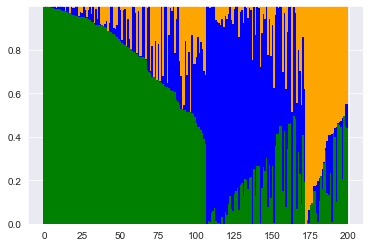

In [123]:
# colors = ['green','blue','orange','red']
# sorted_ind = reorder(q_true)
# ax1 = bar_plot(q_true, sorted_ind, colors)

In [97]:
# Q = uniform(0.5, 1.5).rvs((N, K))
# Pu = uniform(0.5, 1.5).rvs((K, L))
# Pv = uniform(0.5, 1.5).rvs((K, L))
# Z = uniform(0.5, 1.5).rvs(size=(N, L, K))
# β = 1
# γ = 1
# α = np.array([.5] * K)

In [98]:
# for _ in range(100):
#     Z, Q, Pu, Pv = update(Z, Q, Pu, Pv)

In [105]:
# q_pred = normalize(Q, norm='l1', axis=1)

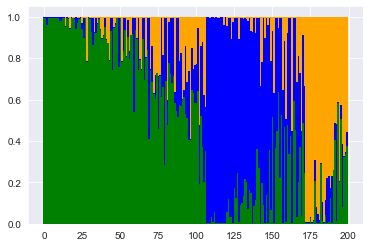

In [124]:
# switch_label = [1,2,0]
# ax2 = bar_plot(q_pred, sorted_ind, colors, switch_label)